1 heat map, 1 spatial chart and 1 contour chart using Python

In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from mpl_toolkits.basemap import Basemap

In [22]:
data_path = ('C:\\Users\\saman\\git_repos\\dsc640-data_presentation\\data\\ex5.2')
exp_file1 = f"{data_path}\\costcos-geocoded.csv"
exp_file2 = f"{data_path}\\ppg2008.csv"
print(exp_file1)
costcos = pd.read_csv(exp_file1,sep=',',header=0)
ppg = pd.read_csv(exp_file2,sep=',',header=0)


C:\Users\saman\git_repos\dsc640-data_presentation\data\ex5.2\costcos-geocoded.csv


In [17]:
ppg.head()

,Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,...,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
0,Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,...,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
1,LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,...,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
2,Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,...,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
3,Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,...,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
4,Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,...,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1


In [8]:
# Shape of the dataframe
ppg.shape

(50, 21)

In [41]:
# checking what the columns are
ppg.columns

Index(['Name  ', 'G', 'MIN', 'PTS', 'FGM', 'FGA', 'FGP', 'FTM', 'FTA', 'FTP',
       '3PM', '3PA', '3PP', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TO',
       'PF'],
      dtype='object')

In [13]:
# selecting some columns from the dataframe
ppg_columns = ppg[['Name  ','G','PTS']]
ppg_columns.head()

,Name,G,PTS
0,Dwyane Wade,79,30.2
1,LeBron James,81,28.4
2,Kobe Bryant,82,26.8
3,Dirk Nowitzki,81,25.9
4,Danny Granger,67,25.8


In [15]:
# selecting the columns in a different way
ppg.loc[:, ['Name  ', 'G', 'PTS']].head()

,Name,G,PTS
0,Dwyane Wade,79,30.2
1,LeBron James,81,28.4
2,Kobe Bryant,82,26.8
3,Dirk Nowitzki,81,25.9
4,Danny Granger,67,25.8


In [18]:
ppg_pivot = ppg.pivot('G', 'MIN', 'PTS', 'FGM', 'FGA', 'FGP', 'FTM', 'FTA', 'FTP',
                      '3PM', '3PA', '3PP', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TO',
                      'PF')
ppg_pivot

TypeError: pivot() takes from 1 to 4 positional arguments but 21 were given

# Heat Map

<Figure size 432x288 with 0 Axes>

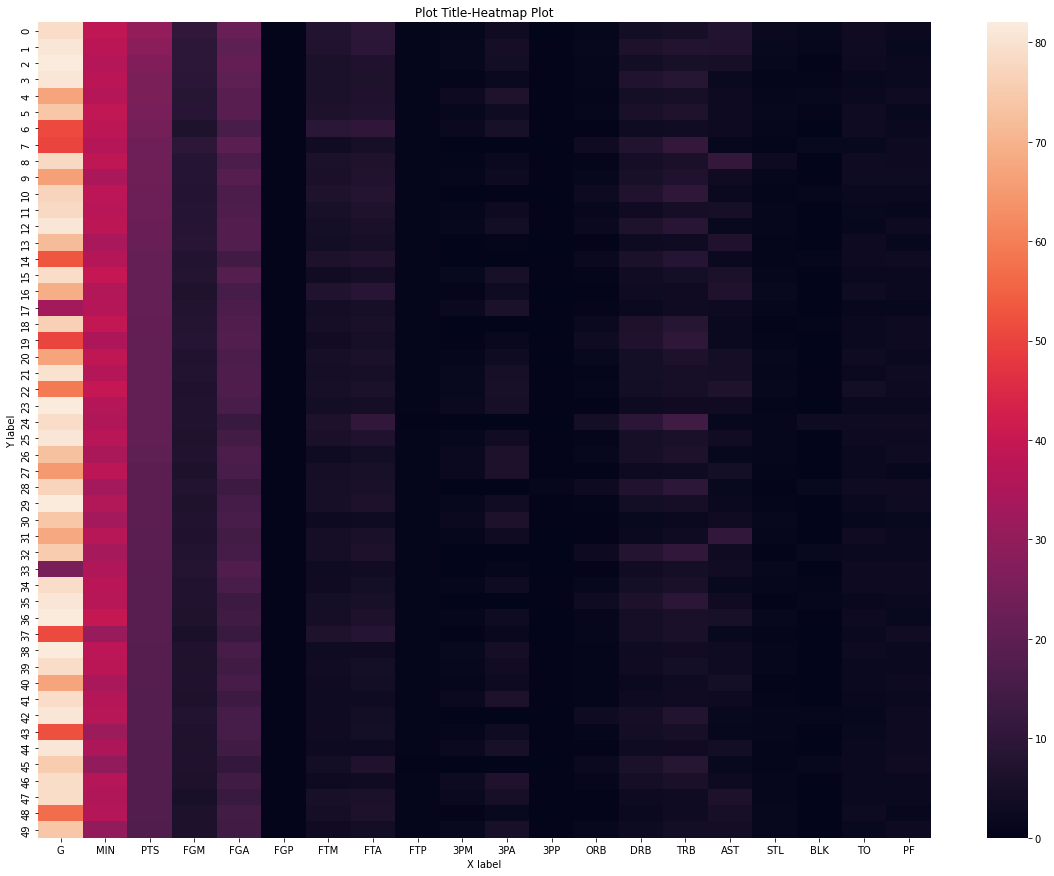

In [43]:
fig = plt.figure()
plt.subplots(figsize=(20,15))
ppg_heatmap = ppg[['G', 'MIN', 'PTS', 'FGM', 'FGA', 'FGP', 'FTM', 'FTA', 'FTP',
                      '3PM', '3PA', '3PP', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TO',
                      'PF']]
# ppg_heatmap
p1 = sns.heatmap(ppg_heatmap)
plt.xlabel("X label")
plt.ylabel("Y label")
plt.title("Plot Title-Heatmap Plot")

plt.show()


# Spatial Chart
## Geocoding
### To geolocate a query to an address and coordinates:

In [18]:
from geopy.geocoders import Nominatim
from geopy.distance import geodesic

geolocator = Nominatim(user_agent='MyTestApp')

location1 = geolocator.geocode("17808 Cinnamon Cir NE")
print(location1.address)
location2 = geolocator.geocode("6 Buchan Road MA")
print(location2.address)
print((location1.latitude, location1.longitude))
print((location2.latitude, location2.longitude))
## print(location.raw)
arindamHome = (location1.latitude, location1.longitude)
mamuniHome = (location2.latitude, location2.longitude)
print(geodesic(arindamHome, mamuniHome).miles)


17808, Cinnamon Circle, Millard, Douglas County, Nebraska, 68135, United States
6, Buchan Road, Andover, Essex County, Massachusetts, 01885, United States
(41.19719665306122, -96.19479389795919)
(42.64443105, -71.11692738627968)
1291.7344708483283


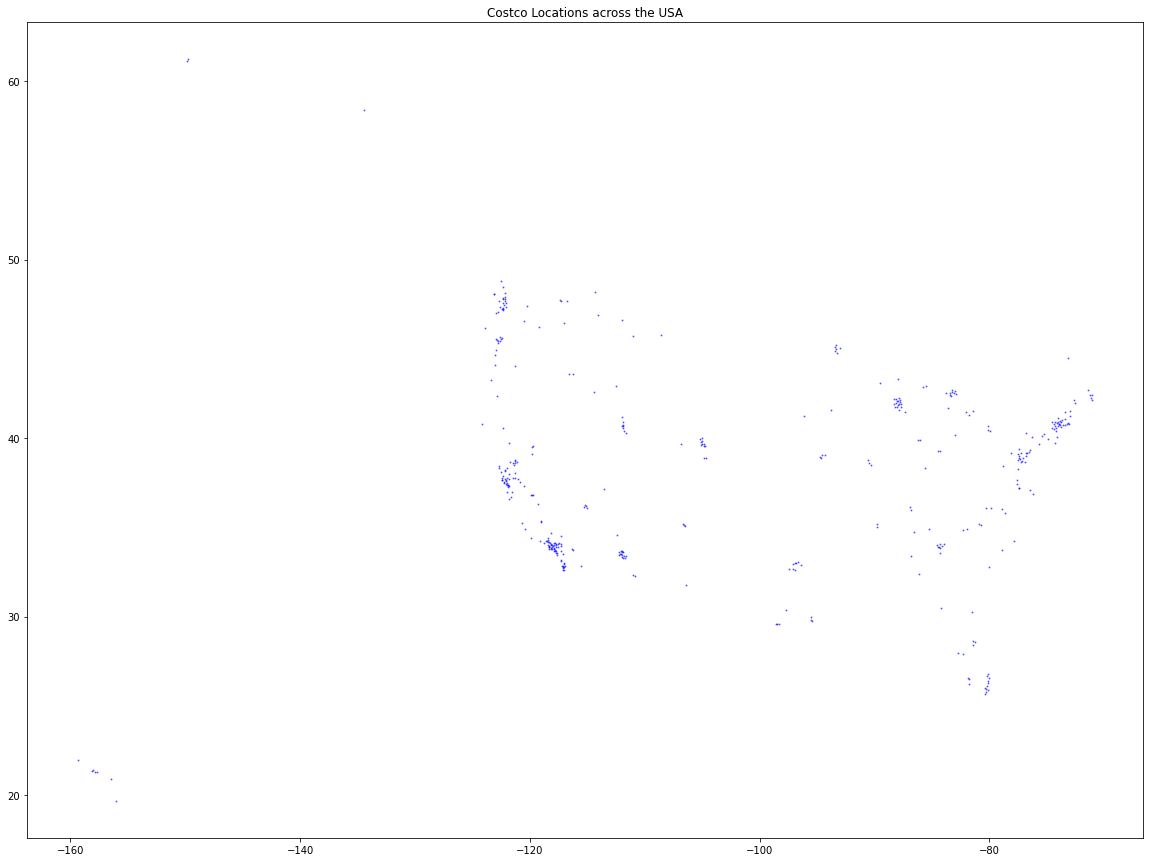

In [27]:
# costcos.head()

# city_long_border = (-74.03, -73.75)
# city_lat_border = (40.63, 40.85)
ax = plt.scatter(costcos['Longitude'].values, costcos['Latitude'].values,
                 color='blue', s=1, label='train', alpha=0.5)
ax.axes.set_title('Costco Locations across the USA')
ax.figure.set_size_inches(20,15)
# plt.ylim(city_lat_border)
# plt.xlim(city_long_border)
plt.show()


### To find the address corresponding to a set of coordinates:

In [14]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="MyTestApp")
location = geolocator.reverse("52.509669, 13.376294")
print(location.address)

Steinecke, Potsdamer Platz, Tiergarten, Mitte, Berlin, 10785, Deutschland


In [15]:
from geopy.distance import geodesic
newport_ri = (41.49008, -71.312796)
cleveland_oh = (41.499498, -81.695391)
print(geodesic(newport_ri, cleveland_oh).miles)

538.3904453677205


# Contour Chart

In [45]:
ppg

,Name,G,MIN,PTS,FGM,FGA,FGP,FTM,FTA,FTP,...,3PA,3PP,ORB,DRB,TRB,AST,STL,BLK,TO,PF
0,Dwyane Wade,79,38.6,30.2,10.8,22.0,0.491,7.5,9.8,0.765,...,3.5,0.317,1.1,3.9,5.0,7.5,2.2,1.3,3.4,2.3
1,LeBron James,81,37.7,28.4,9.7,19.9,0.489,7.3,9.4,0.780,...,4.7,0.344,1.3,6.3,7.6,7.2,1.7,1.1,3.0,1.7
2,Kobe Bryant,82,36.2,26.8,9.8,20.9,0.467,5.9,6.9,0.856,...,4.1,0.351,1.1,4.1,5.2,4.9,1.5,0.5,2.6,2.3
3,Dirk Nowitzki,81,37.7,25.9,9.6,20.0,0.479,6.0,6.7,0.890,...,2.1,0.359,1.1,7.3,8.4,2.4,0.8,0.8,1.9,2.2
4,Danny Granger,67,36.2,25.8,8.5,19.1,0.447,6.0,6.9,0.878,...,6.7,0.404,0.7,4.4,5.1,2.7,1.0,1.4,2.5,3.1
5,Kevin Durant,74,39.0,25.3,8.9,18.8,0.476,6.1,7.1,0.863,...,3.1,0.422,1.0,5.5,6.5,2.8,1.3,0.7,3.0,1.8
6,Kevin Martin,51,38.2,24.6,6.7,15.9,0.420,9.0,10.3,0.867,...,5.4,0.415,0.6,3.0,3.6,2.7,1.2,0.2,2.9,2.3
7,Al Jefferson,50,36.6,23.1,9.7,19.5,0.497,3.7,5.0,0.738,...,0.1,0.000,3.4,7.5,11.0,1.6,0.8,1.7,1.8,2.8
8,Chris Paul,78,38.5,22.8,8.1,16.1,0.503,5.8,6.7,0.868,...,2.3,0.364,0.9,4.7,5.5,11.0,2.8,0.1,3.0,2.7
9,Carmelo Anthony,66,34.5,22.8,8.1,18.3,0.443,5.6,7.1,0.793,...,2.6,0.371,1.6,5.2,6.8,3.4,1.1,0.4,3.0,3.0


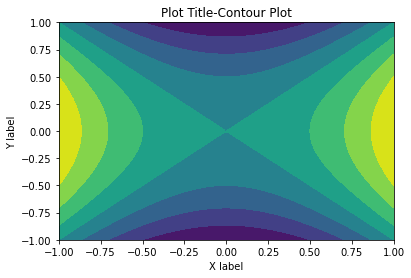

In [37]:
fig = plt.figure()
# ax = plt.subplots(figsize=(20, 15))
ax = fig.add_subplot(111)
u = np.linspace(-1,1,100)
x, y = np.meshgrid(u,u)
z = x**2 - y**2
ax.contourf(x,y,z)

plt.xlabel("X label")
plt.ylabel("Y label")
plt.title("Plot Title-Contour Plot")

plt.show()
